In [77]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from shutil import copyfile
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [78]:
import os
from shutil import copyfile, rmtree

# remove existing images directory
if os.path.exists('./images/'):
    rmtree('./images/')

# create new images directory
os.mkdir('./images/')

# create subdirectories for each letter
alpha = 'a'
for i in range(0, 26): 
    os.mkdir('./images/' + alpha)
    alpha = chr(ord(alpha) + 1)

# copy files to corresponding letter subdirectories
rootdir = '/Users/vahinpalle/Downloads/archive/Braille Dataset/Braille Dataset'
for file in os.listdir(rootdir):
    letter = file[0]
    copyfile(os.path.join(rootdir, file), './images/' + letter + '/' + file)


In [79]:
# create data generators for training and validation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2)

In [80]:
training_generator = train_datagen.flow_from_directory(
    './images/',
    target_size=(28, 28),
    batch_size=32,
    class_mode='categorical',
    subset='training')

Found 1248 images belonging to 26 classes.


In [81]:
validation_generator = train_datagen.flow_from_directory(
    './images/',
    target_size=(28, 28),
    batch_size=32,
    class_mode='categorical',
    subset='validation')

Found 312 images belonging to 26 classes.


In [82]:
# create the model
finalModel = Sequential([
    Conv2D(64, (3,3), activation='relu', input_shape=(28,28,3)),
    MaxPooling2D((2,2)),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Conv2D(256, (2,2), activation='relu'),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dense(26, activation='softmax')
])

In [83]:
# compile the model
finalModel.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy','AUC'])

In [84]:
# train the model
modelTraining = finalModel.fit(
    training_generator,
    epochs=500,
    validation_data=validation_generator)

Epoch 1/500
39/39 [==============================] - 4s 91ms/step - loss: 3.2558 - accuracy: 0.0497 - auc: 0.5157 - val_loss: 3.1592 - val_accuracy: 0.0929 - val_auc: 0.6498
Epoch 2/500
39/39 [==============================] - 3s 76ms/step - loss: 2.8751 - accuracy: 0.1402 - auc: 0.7387 - val_loss: 2.1738 - val_accuracy: 0.3333 - val_auc: 0.8920
Epoch 3/500
39/39 [==============================] - 3s 70ms/step - loss: 2.0866 - accuracy: 0.3662 - auc: 0.8919 - val_loss: 1.4939 - val_accuracy: 0.5929 - val_auc: 0.9461
Epoch 4/500
39/39 [==============================] - 2s 61ms/step - loss: 1.5714 - accuracy: 0.5208 - auc: 0.9387 - val_loss: 1.1135 - val_accuracy: 0.6763 - val_auc: 0.9698
Epoch 5/500
39/39 [==============================] - 2s 62ms/step - loss: 1.3126 - accuracy: 0.5825 - auc: 0.9588 - val_loss: 0.9382 - val_accuracy: 0.7147 - val_auc: 0.9798
Epoch 6/500
39/39 [==============================] - 3s 67ms/step - loss: 1.0614 - accuracy: 0.6603 - auc: 0.9736 - val_loss: 0.82

In [85]:
# evaluate the model
modelAccuracy = finalModel.evaluate_generator(validation_generator)[1]
modelAUC=finalModel.evaluate_generator(validation_generator)[2]
print('model accuracy: {}'.format(round(modelAccuracy,4)))
print('AUC:{}'.format(round(modelAUC,4)))

/opt/anaconda3/lib/python3.9/site-packages/keras/engine/training.py:2006: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


model accuracy: 0.9199
AUC:0.9732


In [102]:
import os
from matplotlib import pyplot as plt
from tensorflow.keras.utils import load_img, img_to_array

import random
import pathlib
import random
import pyttsx3
!pip install faker
!pip install gTTS
from faker import Faker
from gtts import gTTS

resultcmp = ["a","b","c","d","e","f","g","h","i","j","k","l","m","n","o","p","q","r","s","t","u","v","w","x","y","z"]


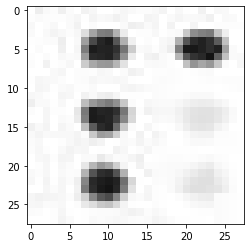

Character: 15
Character: p, Predicted: p


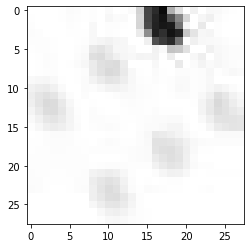

Character: 0
Character: a, Predicted: a


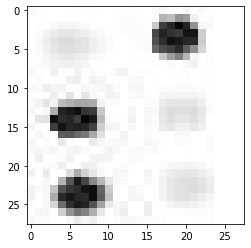

Character: 18
Character: s, Predicted: s


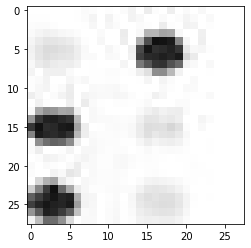

Character: 18
Character: s, Predicted: s
Random word: pass, Statement: pass


In [121]:
import os
import pathlib
import random
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt
import pyttsx3
from faker import Faker

faker = Faker()
random_word = faker.word(ext_word_list=None)[:15]
filename = "/Users/vahinpalle/Downloads/archive/Braille Dataset/Braille Dataset/"
statement = ''
resultcmp = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']

for char in random_word:
    files = [f for f in os.listdir(filename) if f.endswith('.jpg') and f.startswith(char)]
    random_file = os.path.join(filename, random.choice(files))
    test_image = load_img(random_file, target_size=(28, 28))
    test_image = img_to_array(test_image)/255.0
    plt.imshow(test_image)
    plt.show()
    test_image = np.expand_dims(test_image, axis=0)
    result = finalModel.predict(test_image)
    index = tf.argmax(result, axis=-1).numpy()[0]
    print(f"Character: {index}")
    predicted_char = resultcmp[index]
    print(f"Character: {char}, Predicted: {predicted_char}")
    statement += predicted_char

print(f"Random word: {random_word}, Statement: {statement}")

engine = pyttsx3.init()
engine.say(statement)
engine.runAndWait()
